In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.feature_selection import VarianceThreshold
import warnings
warnings.filterwarnings("ignore")

In [2]:
# load  dataset
data = pd.read_csv('H2HBABBA2629.csv')
data.shape

(50000, 19)

# Train-Test Split

In [3]:
# train test split
train=data.loc[data['clear_date'].notnull()]
test =data.loc[data['clear_date'].isnull()]

In [4]:
train.shape,test.shape

((40000, 19), (10000, 19))

# Preprocessing

# Null imputation

In [5]:
train.describe() # geting the mean max count 

,buisness_year,doc_id,document_create_date,document_create_date.1,due_in_date,posting_id,area_business,total_open_amount,baseline_create_date,invoice_id,isOpen
count,40000.000000,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,40000.0,0.0,4.000000e+04,4.000000e+04,3.999600e+04,40000.0
mean,2019.132700,2.010252e+09,2.019179e+07,2.019183e+07,2.019200e+07,1.0,NaN,3.219895e+04,2.019183e+07,2.009503e+09,0.0
std,0.339254,2.839516e+08,3.248662e+03,3.243445e+03,3.287676e+03,0.0,NaN,4.025293e+04,3.245037e+03,2.739082e+08,0.0
min,2019.000000,1.928500e+09,2.018123e+07,2.018062e+07,2.018063e+07,1.0,NaN,8.400000e-01,2.018062e+07,1.928500e+09,0.0
25%,2019.000000,1.929174e+09,2.019041e+07,2.019041e+07,2.019043e+07,1.0,NaN,4.676085e+03,2.019041e+07,1.929174e+09,0.0
50%,2019.000000,1.929718e+09,2.019072e+07,2.019072e+07,2.019081e+07,1.0,NaN,1.726131e+04,2.019072e+07,1.929718e+09,0.0
75%,2019.000000,1.930205e+09,2.019103e+07,2.019103e+07,2.019112e+07,1.0,NaN,4.642275e+04,2.019103e+07,1.930205e+09,0.0
max,2020.000000,9.500000e+09,2.020030e+07,2.020023e+07,2.020062e+07,1.0,NaN,1.501474e+06,2.020032e+07,2.960617e+09,0.0


In [6]:
train.isna().sum() # checking for null values in column

business_code                 0
cust_number                   0
name_customer                 0
clear_date                    0
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             40000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    4
isOpen                        0
dtype: int64

In [7]:
train.drop('area_business',axis=1,inplace=True) # droping the fully null column

In [8]:
train.dropna(subset=['invoice_id'],axis=0,how='any',inplace=True) # droping partial null column

In [9]:
train.isna().sum()  # all the null value has been drop

business_code             0
cust_number               0
name_customer             0
clear_date                0
buisness_year             0
doc_id                    0
posting_date              0
document_create_date      0
document_create_date.1    0
due_in_date               0
invoice_currency          0
document type             0
posting_id                0
total_open_amount         0
baseline_create_date      0
cust_payment_terms        0
invoice_id                0
isOpen                    0
dtype: int64

In [10]:
train['doc_id'].corr(train['invoice_id']) # checking corrleation of these data

1.0

In [11]:
#droping column as it's completely correlated  with  Invoice_id
train.drop('doc_id',axis=1,inplace=True)

In [12]:
train['document_create_date'].corr(train['document_create_date.1']) # checking corrleation of these data

0.9856633906229535

In [13]:
#droping column as it's completely correlated  with  document_create_date.1
train.drop('document_create_date.1',axis=1,inplace=True)

In [14]:
#duplicate row removal
train=train.drop_duplicates(keep='first')

In [15]:
train.shape #confirming droped value

(39139, 16)

In [16]:
train.drop('document type',axis=1,inplace=True) # droping Document type as it has constant value

In [17]:
train.cov() #Checking for covarience

,buisness_year,document_create_date,due_in_date,posting_id,total_open_amount,baseline_create_date,invoice_id,isOpen
buisness_year,0.115023,1.043770e+03,1.088925e+03,0.0,-1.172311e+02,1.058587e+03,-1.813568e+05,0.0
document_create_date,1043.770400,1.055045e+07,1.003051e+07,0.0,-5.351736e+05,1.036266e+07,2.415616e+09,0.0
due_in_date,1088.925078,1.003051e+07,1.079510e+07,0.0,-1.243690e+06,1.016673e+07,-2.748104e+09,0.0
posting_id,0.000000,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0
total_open_amount,-117.231062,-5.351736e+05,-1.243690e+06,0.0,1.624771e+09,-7.006923e+05,2.036088e+12,0.0
baseline_create_date,1058.586825,1.036266e+07,1.016673e+07,0.0,-7.006923e+05,1.051986e+07,4.382170e+09,0.0
invoice_id,-181356.778917,2.415616e+09,-2.748104e+09,0.0,2.036088e+12,4.382170e+09,7.510773e+16,0.0
isOpen,0.000000,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0


In [18]:
train.nunique() # checking for unique data

business_code               6
cust_number              1338
name_customer            3898
clear_date                395
buisness_year               2
posting_date              423
document_create_date      427
due_in_date               486
invoice_currency            2
posting_id                  1
total_open_amount       35586
baseline_create_date      430
cust_payment_terms         68
invoice_id              39139
isOpen                      1
dtype: int64

In [19]:
#unique_columnn


# Date Time conversion

In [20]:
train.dtypes # checking for data types

business_code            object
cust_number              object
name_customer            object
clear_date               object
buisness_year           float64
posting_date             object
document_create_date      int64
due_in_date             float64
invoice_currency         object
posting_id              float64
total_open_amount       float64
baseline_create_date    float64
cust_payment_terms       object
invoice_id              float64
isOpen                    int64
dtype: object

In [21]:
# converting data types into float and int as model only takes float and int
train['document_create_date']=train['document_create_date'].astype(str)
train['due_in_date']=train['due_in_date'].astype(str)
train['clear_date']=train['clear_date'].astype(str)
train['posting_date']=train['posting_date'].astype(str)
train['baseline_create_date']=train['baseline_create_date'].astype(str)
train['buisness_year']=train['buisness_year'].astype(np.int64)

In [22]:
# changing date into date time format
train['clear_date']= pd.to_datetime(train['clear_date'])
train['posting_date']= pd.to_datetime(train['posting_date'])
train['document_create_date']= pd.to_datetime(train['document_create_date'])

In [23]:
train['baseline_create_date'] = pd.to_datetime(train['baseline_create_date'], format="%Y%m%d")

In [24]:
train['due_in_date'] = pd.to_datetime(train['due_in_date'], format="%Y%m%d")

In [25]:
train.dtypes

business_code                   object
cust_number                     object
name_customer                   object
clear_date              datetime64[ns]
buisness_year                    int64
posting_date            datetime64[ns]
document_create_date    datetime64[ns]
due_in_date             datetime64[ns]
invoice_currency                object
posting_id                     float64
total_open_amount              float64
baseline_create_date    datetime64[ns]
cust_payment_terms              object
invoice_id                     float64
isOpen                           int64
dtype: object

In [26]:
train

,business_code,cust_number,name_customer,clear_date,buisness_year,posting_date,document_create_date,due_in_date,invoice_currency,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,200744019,TARG in,2019-06-04,2019,2019-05-16,2019-05-15,2019-05-31,USD,1.0,26495.99,2019-05-16,NAA8,1.929321e+09,0
1,CA02,0140104409,LOB us,2019-10-21,2019,2019-10-05,2019-10-05,2019-10-25,CAD,1.0,92641.08,2019-10-15,CA10,2.960584e+09,0
2,U001,0100015557,BI corp,2019-07-08,2019,2019-06-26,2019-06-26,2019-07-11,USD,1.0,24370.68,2019-06-26,NAA8,1.929543e+09,0
3,U001,0200148860,DOLLA associates,2019-11-13,2019,2019-10-29,2019-10-29,2019-11-13,USD,1.0,120891.07,2019-10-29,NAA8,1.930063e+09,0
4,U001,0200772670,ASSOCIAT llc,2019-04-08,2019,2019-03-22,2019-03-23,2019-04-06,USD,1.0,14785.70,2019-03-22,NAU5,1.929015e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49993,U001,0200769623,WAL-MAR us,2019-07-16,2019,2019-07-06,2019-07-04,2019-07-21,USD,1.0,63720.73,2019-07-06,NAH4,1.929579e+09,0
49994,CA02,0140104409,LOB co,2019-02-08,2019,2019-01-23,2019-01-23,2019-02-11,CAD,1.0,97373.69,2019-02-01,CA10,2.960524e+09,0
49995,U001,0200769623,WAL-MAR corp,2020-01-17,2020,2020-01-07,2020-01-04,2020-01-22,USD,1.0,15891.98,2020-01-07,NAH4,1.930353e+09,0
49996,U001,0200762301,C&S WH corp,2020-02-04,2020,2020-01-18,2020-01-17,2020-02-02,USD,1.0,92438.87,2020-01-18,NAC6,1.930409e+09,0


In [27]:
 #drop is open and posting id as they are constant
uni_cols =  [z for z in train.columns if train[z].nunique()==1] 
train.drop(uni_cols,axis=1,inplace=True)

In [28]:
train

,business_code,cust_number,name_customer,clear_date,buisness_year,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id
0,U001,200744019,TARG in,2019-06-04,2019,2019-05-16,2019-05-15,2019-05-31,USD,26495.99,2019-05-16,NAA8,1.929321e+09
1,CA02,0140104409,LOB us,2019-10-21,2019,2019-10-05,2019-10-05,2019-10-25,CAD,92641.08,2019-10-15,CA10,2.960584e+09
2,U001,0100015557,BI corp,2019-07-08,2019,2019-06-26,2019-06-26,2019-07-11,USD,24370.68,2019-06-26,NAA8,1.929543e+09
3,U001,0200148860,DOLLA associates,2019-11-13,2019,2019-10-29,2019-10-29,2019-11-13,USD,120891.07,2019-10-29,NAA8,1.930063e+09
4,U001,0200772670,ASSOCIAT llc,2019-04-08,2019,2019-03-22,2019-03-23,2019-04-06,USD,14785.70,2019-03-22,NAU5,1.929015e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49993,U001,0200769623,WAL-MAR us,2019-07-16,2019,2019-07-06,2019-07-04,2019-07-21,USD,63720.73,2019-07-06,NAH4,1.929579e+09
49994,CA02,0140104409,LOB co,2019-02-08,2019,2019-01-23,2019-01-23,2019-02-11,CAD,97373.69,2019-02-01,CA10,2.960524e+09
49995,U001,0200769623,WAL-MAR corp,2020-01-17,2020,2020-01-07,2020-01-04,2020-01-22,USD,15891.98,2020-01-07,NAH4,1.930353e+09
49996,U001,0200762301,C&S WH corp,2020-02-04,2020,2020-01-18,2020-01-17,2020-02-02,USD,92438.87,2020-01-18,NAC6,1.930409e+09


#Normalizing amount

In [29]:
# equalizing 1 cad=0.81 usd
train.loc[train.invoice_currency== "CAD", 'total_open_amount'] = train['total_open_amount']*0.81

In [30]:
train

,business_code,cust_number,name_customer,clear_date,buisness_year,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id
0,U001,200744019,TARG in,2019-06-04,2019,2019-05-16,2019-05-15,2019-05-31,USD,26495.9900,2019-05-16,NAA8,1.929321e+09
1,CA02,0140104409,LOB us,2019-10-21,2019,2019-10-05,2019-10-05,2019-10-25,CAD,75039.2748,2019-10-15,CA10,2.960584e+09
2,U001,0100015557,BI corp,2019-07-08,2019,2019-06-26,2019-06-26,2019-07-11,USD,24370.6800,2019-06-26,NAA8,1.929543e+09
3,U001,0200148860,DOLLA associates,2019-11-13,2019,2019-10-29,2019-10-29,2019-11-13,USD,120891.0700,2019-10-29,NAA8,1.930063e+09
4,U001,0200772670,ASSOCIAT llc,2019-04-08,2019,2019-03-22,2019-03-23,2019-04-06,USD,14785.7000,2019-03-22,NAU5,1.929015e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49993,U001,0200769623,WAL-MAR us,2019-07-16,2019,2019-07-06,2019-07-04,2019-07-21,USD,63720.7300,2019-07-06,NAH4,1.929579e+09
49994,CA02,0140104409,LOB co,2019-02-08,2019,2019-01-23,2019-01-23,2019-02-11,CAD,78872.6889,2019-02-01,CA10,2.960524e+09
49995,U001,0200769623,WAL-MAR corp,2020-01-17,2020,2020-01-07,2020-01-04,2020-01-22,USD,15891.9800,2020-01-07,NAH4,1.930353e+09
49996,U001,0200762301,C&S WH corp,2020-02-04,2020,2020-01-18,2020-01-17,2020-02-02,USD,92438.8700,2020-01-18,NAC6,1.930409e+09


# sorting On The Basis of posting_date

In [31]:
train=train.sort_values(by=['posting_date'],ascending=True).reset_index(drop=True)

In [32]:
train

,business_code,cust_number,name_customer,clear_date,buisness_year,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id
0,U001,0200761342,EL GR associates,2019-01-14,2019,2018-12-30,2018-12-29,2019-01-14,USD,4593.26,2018-12-30,NAA8,1.928535e+09
1,U001,0200769623,WAL-MAR corporation,2019-01-09,2019,2018-12-30,2018-12-29,2019-01-14,USD,79309.48,2018-12-30,NAH4,1.928537e+09
2,U001,0200769623,WAL-MAR associates,2019-01-09,2019,2018-12-30,2018-12-30,2019-01-14,USD,38289.77,2018-12-30,NAH4,1.928542e+09
3,U001,0200762301,C&S WH us,2019-01-15,2019,2018-12-30,2018-12-29,2019-01-14,USD,1911.77,2018-12-30,NAC6,1.928540e+09
4,U001,0200769623,WAL-MAR,2019-01-15,2019,2018-12-30,2018-12-29,2019-01-14,USD,73065.70,2018-12-30,NAH4,1.928531e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39134,U001,0200769623,WAL-MAR foundation,2020-03-09,2020,2020-02-26,2020-02-25,2020-03-12,USD,69712.31,2020-02-26,NAH4,1.930567e+09
39135,U001,0200794332,COST in,2020-03-12,2020,2020-02-27,2020-02-27,2020-03-13,USD,13720.67,2020-02-27,NAAX,1.930577e+09
39136,U001,0200759878,SA corp,2020-03-13,2020,2020-02-27,2020-02-26,2020-03-13,USD,65988.21,2020-02-27,NAH4,1.930572e+09
39137,U001,0200759878,SA associates,2020-03-13,2020,2020-02-27,2020-02-26,2020-03-13,USD,3396.48,2020-02-27,NAH4,1.930572e+09


In [33]:
#  making of delay Delay column 
train['Delay']= (train['clear_date'] - train['due_in_date']).dt.days

In [34]:
#outlier removal from the data set
Q1 = train['total_open_amount'].quantile(0.25)
Q3 = train['total_open_amount'].quantile(0.75)
IQR = Q3-Q1

In [35]:
train[(train['total_open_amount'] < Q1-3*IQR) |(train['total_open_amount'] > Q3+3*IQR)].shape

(312, 14)

In [36]:
train=train.loc[(train['total_open_amount'] > Q1-3*IQR) &(train['total_open_amount'] < Q3+3*IQR)]

In [37]:
train

,business_code,cust_number,name_customer,clear_date,buisness_year,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,Delay
0,U001,0200761342,EL GR associates,2019-01-14,2019,2018-12-30,2018-12-29,2019-01-14,USD,4593.26,2018-12-30,NAA8,1.928535e+09,0
1,U001,0200769623,WAL-MAR corporation,2019-01-09,2019,2018-12-30,2018-12-29,2019-01-14,USD,79309.48,2018-12-30,NAH4,1.928537e+09,-5
2,U001,0200769623,WAL-MAR associates,2019-01-09,2019,2018-12-30,2018-12-30,2019-01-14,USD,38289.77,2018-12-30,NAH4,1.928542e+09,-5
3,U001,0200762301,C&S WH us,2019-01-15,2019,2018-12-30,2018-12-29,2019-01-14,USD,1911.77,2018-12-30,NAC6,1.928540e+09,1
4,U001,0200769623,WAL-MAR,2019-01-15,2019,2018-12-30,2018-12-29,2019-01-14,USD,73065.70,2018-12-30,NAH4,1.928531e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39134,U001,0200769623,WAL-MAR foundation,2020-03-09,2020,2020-02-26,2020-02-25,2020-03-12,USD,69712.31,2020-02-26,NAH4,1.930567e+09,-3
39135,U001,0200794332,COST in,2020-03-12,2020,2020-02-27,2020-02-27,2020-03-13,USD,13720.67,2020-02-27,NAAX,1.930577e+09,-1
39136,U001,0200759878,SA corp,2020-03-13,2020,2020-02-27,2020-02-26,2020-03-13,USD,65988.21,2020-02-27,NAH4,1.930572e+09,0
39137,U001,0200759878,SA associates,2020-03-13,2020,2020-02-27,2020-02-26,2020-03-13,USD,3396.48,2020-02-27,NAH4,1.930572e+09,0


# Train -Test -Validation split

In [38]:
#Seperating Delay column
y=train['Delay']

In [39]:
y.head()

0    0
1   -5
2   -5
3    1
4    1
Name: Delay, dtype: int64

In [40]:
X=train.drop(['Delay'],axis=1)

In [41]:
# dividing in train and intermediate
x_train,x_inter,y_train,y_inter = train_test_split(X,y,test_size=0.2,random_state=0,shuffle=False)

In [42]:
x_train.shape,x_inter.shape

((31061, 13), (7766, 13))

In [43]:
# dividing in validation and test
x_val,x_test,y_val,y_test =train_test_split(x_inter,y_inter,test_size=0.5,random_state=0,shuffle=False)

In [44]:
x_val.shape,x_test.shape

((3883, 13), (3883, 13))

# EDA

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

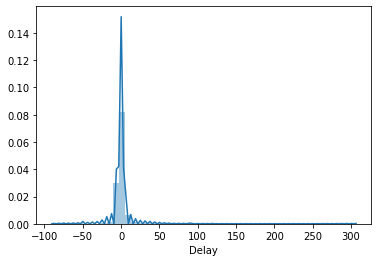

In [46]:
# distribution of the target(Delay) column 
# right skewed distribution
# outliers present but not that significant , hence
sns.distplot(y_train)

{'whiskers': [<matplotlib.lines.Line2D at 0x23245b6da48>,
 'caps': [<matplotlib.lines.Line2D at 0x23245b71a08>,
 'boxes': [<matplotlib.lines.Line2D at 0x23245b59388>],
 'medians': [<matplotlib.lines.Line2D at 0x23245b74988>],
 'fliers': [<matplotlib.lines.Line2D at 0x23245b74fc8>],
 'means': []}

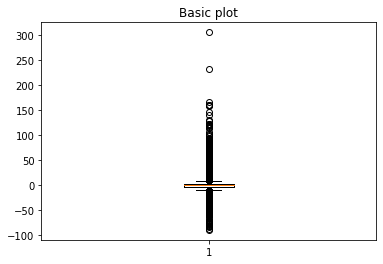

In [47]:
# box plot for outliers check
fig1, ax1 = plt.subplots()
ax1.set_title('Basic plot')
ax1.boxplot(y_train)

In [48]:
y_train.dtype # checking data type of delay column 

dtype('int64')

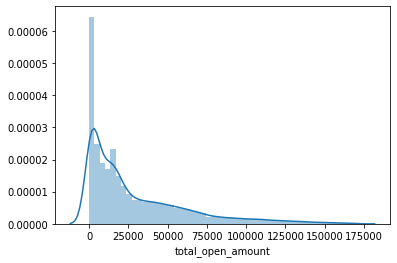

In [49]:
sns.distplot(x_train['total_open_amount']) 

In [50]:
x_train['total_open_amount_log']=np.log(x_train['total_open_amount']) # maping the data using log to get better accyracy

In [51]:
x_val['total_open_amount_log']=np.log(x_val['total_open_amount'])

In [52]:
x_test['total_open_amount_log']=np.log(x_test['total_open_amount'])

In [53]:
x_train.merge(y_train,on = x_train.index)

,key_0,business_code,cust_number,name_customer,clear_date,buisness_year,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,total_open_amount_log,Delay
0,0,U001,0200761342,EL GR associates,2019-01-14,2019,2018-12-30,2018-12-29,2019-01-14,USD,4593.26,2018-12-30,NAA8,1.928535e+09,8.432345,0
1,1,U001,0200769623,WAL-MAR corporation,2019-01-09,2019,2018-12-30,2018-12-29,2019-01-14,USD,79309.48,2018-12-30,NAH4,1.928537e+09,11.281113,-5
2,2,U001,0200769623,WAL-MAR associates,2019-01-09,2019,2018-12-30,2018-12-30,2019-01-14,USD,38289.77,2018-12-30,NAH4,1.928542e+09,10.552938,-5
3,3,U001,0200762301,C&S WH us,2019-01-15,2019,2018-12-30,2018-12-29,2019-01-14,USD,1911.77,2018-12-30,NAC6,1.928540e+09,7.555785,1
4,4,U001,0200769623,WAL-MAR,2019-01-15,2019,2018-12-30,2018-12-29,2019-01-14,USD,73065.70,2018-12-30,NAH4,1.928531e+09,11.199114,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31056,31309,U001,0200706844,WINC us,2019-12-05,2019,2019-11-19,2019-11-18,2019-12-04,USD,6579.78,2019-11-19,NAA8,1.930164e+09,8.791757,1
31057,31310,U001,0200726979,BJ'S corporation,2019-12-04,2019,2019-11-19,2019-11-19,2019-12-04,USD,311.93,2019-11-19,NAA8,1.930170e+09,5.742779,0
31058,31311,U001,0200792293,UNIFIE corp,2019-12-04,2019,2019-11-19,2019-11-18,2019-12-04,USD,51234.77,2019-11-19,NAA8,1.930166e+09,10.844174,0
31059,31312,U001,0200397526,JAKE in,2019-12-16,2019,2019-11-19,2019-11-15,2019-12-04,USD,10130.62,2019-11-19,NAA8,1.930158e+09,9.223318,12


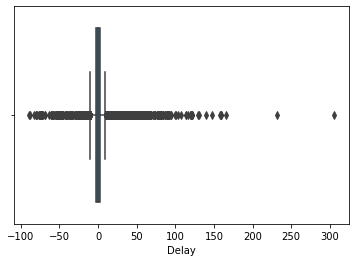

In [54]:
sns.boxplot(x=y_train)

# FEATURE ENGINEERING

##LabelEncoding

In [55]:
from sklearn.preprocessing import LabelEncoder

In [56]:
x_train.dtypes

business_code                    object
cust_number                      object
name_customer                    object
clear_date               datetime64[ns]
buisness_year                     int64
posting_date             datetime64[ns]
document_create_date     datetime64[ns]
due_in_date              datetime64[ns]
invoice_currency                 object
total_open_amount               float64
baseline_create_date     datetime64[ns]
cust_payment_terms               object
invoice_id                      float64
total_open_amount_log           float64
dtype: object

In [57]:
x_train.business_code.value_counts()

U001    28267
CA02     2258
U013      435
U002       93
U007        4
U005        4
Name: business_code, dtype: int64

In [58]:
#lavel encoding of business_code for all three data set
business_code_enc = LabelEncoder()
business_code_enc.fit(x_train['business_code'])
x_train['business_code_enc'] = business_code_enc.transform(x_train['business_code'])

In [59]:
x_val['business_code_enc'] = business_code_enc.transform(x_val['business_code'])
x_test['business_code_enc'] = business_code_enc.transform(x_test['business_code'])

In [60]:
# defining a function to drop the encoded column so that we don't need to use drop code again and again
def snap(col,traindf =x_train,valdf = x_val,testdf = x_test):
    traindf.drop(col,inplace=True,axis=1)
    valdf.drop(col,inplace=True,axis=1)
    testdf.drop(col,inplace=True,axis=1)
    return traindf,valdf,testdf

In [61]:
# Droping business column as it is encoded
x_train,x_val,x_test = snap("business_code")

In [62]:
x_train.dtypes

cust_number                      object
name_customer                    object
clear_date               datetime64[ns]
buisness_year                     int64
posting_date             datetime64[ns]
document_create_date     datetime64[ns]
due_in_date              datetime64[ns]
invoice_currency                 object
total_open_amount               float64
baseline_create_date     datetime64[ns]
cust_payment_terms               object
invoice_id                      float64
total_open_amount_log           float64
business_code_enc                 int32
dtype: object

In [63]:
# counting different values
x_train.invoice_currency.value_counts()

USD    28802
CAD     2259
Name: invoice_currency, dtype: int64

In [64]:
# encoding invoice_currency using labelEncoder
invoice_currency_enc = LabelEncoder()
invoice_currency_enc.fit(x_train['invoice_currency'])
x_train['invoice_currency_enc'] = invoice_currency_enc.transform(x_train['invoice_currency'])
x_val['invoice_currency_enc'] = invoice_currency_enc.transform(x_val['invoice_currency'])
x_test['invoice_currency_enc'] = invoice_currency_enc.transform(x_test['invoice_currency'])

In [65]:
x_train,x_val,x_test = snap("invoice_currency")

In [66]:
x_train.head()

,cust_number,name_customer,clear_date,buisness_year,posting_date,document_create_date,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,total_open_amount_log,business_code_enc,invoice_currency_enc
0,0200761342,EL GR associates,2019-01-14,2019,2018-12-30,2018-12-29,2019-01-14,4593.26,2018-12-30,NAA8,1.928535e+09,8.432345,1,1
1,0200769623,WAL-MAR corporation,2019-01-09,2019,2018-12-30,2018-12-29,2019-01-14,79309.48,2018-12-30,NAH4,1.928537e+09,11.281113,1,1
2,0200769623,WAL-MAR associates,2019-01-09,2019,2018-12-30,2018-12-30,2019-01-14,38289.77,2018-12-30,NAH4,1.928542e+09,10.552938,1,1
3,0200762301,C&S WH us,2019-01-15,2019,2018-12-30,2018-12-29,2019-01-14,1911.77,2018-12-30,NAC6,1.928540e+09,7.555785,1,1
4,0200769623,WAL-MAR,2019-01-15,2019,2018-12-30,2018-12-29,2019-01-14,73065.70,2018-12-30,NAH4,1.928531e+09,11.199114,1,1


In [67]:
# extract date , day ,month , year of the journey
# 0--> Monday ..... 6--> Sunday
x_train['post_Date_of_week']=x_train['posting_date'].dt.weekday
x_val['post_Date_of_week']=x_val['posting_date'].dt.weekday
x_test['post_Date_of_week']=x_test['posting_date'].dt.weekday

x_train['post_Day']=x_train['posting_date'].dt.day
x_val['post_Day']=x_val['posting_date'].dt.day
x_test['post_Day']=x_test['posting_date'].dt.day

x_train['post_month']=x_train['posting_date'].dt.month
x_val['post_month']=x_val['posting_date'].dt.month
x_test['post_month']=x_test['posting_date'].dt.month

x_train['post_year']=x_train['posting_date'].dt.year
x_val['post_year']=x_val['posting_date'].dt.year
x_test['post_year']=x_test['posting_date'].dt.year

In [68]:
x_train,x_val,x_test = snap("posting_date")

In [69]:
x_train.head()

,cust_number,name_customer,clear_date,buisness_year,document_create_date,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,total_open_amount_log,business_code_enc,invoice_currency_enc,post_Date_of_week,post_Day,post_month,post_year
0,0200761342,EL GR associates,2019-01-14,2019,2018-12-29,2019-01-14,4593.26,2018-12-30,NAA8,1.928535e+09,8.432345,1,1,6,30,12,2018
1,0200769623,WAL-MAR corporation,2019-01-09,2019,2018-12-29,2019-01-14,79309.48,2018-12-30,NAH4,1.928537e+09,11.281113,1,1,6,30,12,2018
2,0200769623,WAL-MAR associates,2019-01-09,2019,2018-12-30,2019-01-14,38289.77,2018-12-30,NAH4,1.928542e+09,10.552938,1,1,6,30,12,2018
3,0200762301,C&S WH us,2019-01-15,2019,2018-12-29,2019-01-14,1911.77,2018-12-30,NAC6,1.928540e+09,7.555785,1,1,6,30,12,2018
4,0200769623,WAL-MAR,2019-01-15,2019,2018-12-29,2019-01-14,73065.70,2018-12-30,NAH4,1.928531e+09,11.199114,1,1,6,30,12,2018


In [70]:
# value count for customer name
x_train.name_customer.value_counts()

WAL-MAR llc        697
WAL-MAR systems    692
WAL-MAR us         689
WAL-MAR co         681
WAL-MAR in         677
                  ... 
LABAT trust          1
NATURA corp          1
DICK co              1
DEALER systems       1
WEST  co             1
Name: name_customer, Length: 3531, dtype: int64

In [71]:
x_train.dtypes

cust_number                      object
name_customer                    object
clear_date               datetime64[ns]
buisness_year                     int64
document_create_date     datetime64[ns]
due_in_date              datetime64[ns]
total_open_amount               float64
baseline_create_date     datetime64[ns]
cust_payment_terms               object
invoice_id                      float64
total_open_amount_log           float64
business_code_enc                 int32
invoice_currency_enc              int32
post_Date_of_week                 int64
post_Day                          int64
post_month                        int64
post_year                         int64
dtype: object

In [72]:
# extract date , day ,month , year of the journey
# 0--> Monday ..... 6--> Sunday
x_train['due_in_week']=x_train['due_in_date'].dt.weekday
x_val['due_in_week']=x_val['due_in_date'].dt.weekday
x_test['due_in_week']=x_test['due_in_date'].dt.weekday

x_train['due_in_day']=x_train['due_in_date'].dt.day
x_val['due_in_day']=x_val['due_in_date'].dt.day
x_test['due_in_day']=x_test['due_in_date'].dt.day

x_train['due_in_month']=x_train['due_in_date'].dt.month
x_val['due_in_month']=x_val['due_in_date'].dt.month
x_test['due_in_month']=x_test['due_in_date'].dt.month

x_train['due_in_year']=x_train['due_in_date'].dt.year
x_val['due_in_year']=x_val['due_in_date'].dt.year
x_test['due_in_year']=x_test['due_in_date'].dt.year

In [73]:
x_train.dtypes

cust_number                      object
name_customer                    object
clear_date               datetime64[ns]
buisness_year                     int64
document_create_date     datetime64[ns]
due_in_date              datetime64[ns]
total_open_amount               float64
baseline_create_date     datetime64[ns]
cust_payment_terms               object
invoice_id                      float64
total_open_amount_log           float64
business_code_enc                 int32
invoice_currency_enc              int32
post_Date_of_week                 int64
post_Day                          int64
post_month                        int64
post_year                         int64
due_in_week                       int64
due_in_day                        int64
due_in_month                      int64
due_in_year                       int64
dtype: object

In [74]:
x_train,x_val,x_test = snap("due_in_date")

In [75]:
# customer payment terms different term count
x_train.cust_payment_terms.value_counts()

NAA8    12670
NAH4     8211
CA10     2189
NAC6      973
NAM4      802
        ...  
NATX        1
CAX2        1
NAUI        1
NABD        1
CAB1        1
Name: cust_payment_terms, Length: 64, dtype: int64

In [76]:
x_train,x_val,x_test = snap("baseline_create_date")

In [77]:
x_train,x_val,x_test = snap("document_create_date")
x_train,x_val,x_test = snap("clear_date")

In [78]:
x_train.dtypes

cust_number               object
name_customer             object
buisness_year              int64
total_open_amount        float64
cust_payment_terms        object
invoice_id               float64
total_open_amount_log    float64
business_code_enc          int32
invoice_currency_enc       int32
post_Date_of_week          int64
post_Day                   int64
post_month                 int64
post_year                  int64
due_in_week                int64
due_in_day                 int64
due_in_month               int64
due_in_year                int64
dtype: object

In [79]:
x_train.head()

,cust_number,name_customer,buisness_year,total_open_amount,cust_payment_terms,invoice_id,total_open_amount_log,business_code_enc,invoice_currency_enc,post_Date_of_week,post_Day,post_month,post_year,due_in_week,due_in_day,due_in_month,due_in_year
0,0200761342,EL GR associates,2019,4593.26,NAA8,1.928535e+09,8.432345,1,1,6,30,12,2018,0,14,1,2019
1,0200769623,WAL-MAR corporation,2019,79309.48,NAH4,1.928537e+09,11.281113,1,1,6,30,12,2018,0,14,1,2019
2,0200769623,WAL-MAR associates,2019,38289.77,NAH4,1.928542e+09,10.552938,1,1,6,30,12,2018,0,14,1,2019
3,0200762301,C&S WH us,2019,1911.77,NAC6,1.928540e+09,7.555785,1,1,6,30,12,2018,0,14,1,2019
4,0200769623,WAL-MAR,2019,73065.70,NAH4,1.928531e+09,11.199114,1,1,6,30,12,2018,0,14,1,2019


In [80]:
x_val.dtypes

cust_number               object
name_customer             object
buisness_year              int64
total_open_amount        float64
cust_payment_terms        object
invoice_id               float64
total_open_amount_log    float64
business_code_enc          int32
invoice_currency_enc       int32
post_Date_of_week          int64
post_Day                   int64
post_month                 int64
post_year                  int64
due_in_week                int64
due_in_day                 int64
due_in_month               int64
due_in_year                int64
dtype: object

In [81]:
# target encoding for those column which contain large value count  and label encoding doesnot 
# Giving proper efficiency on test data
cust_name_mean_t = x_train.merge(y_train,on = x_train.index).groupby(['name_customer'])['Delay'].mean().to_dict()
x_train['name_customer_enc']=x_train['name_customer'].map(cust_name_mean_t)

cust_name_mean_v = x_val.merge(y_val,on = x_val.index).groupby(['name_customer'])['Delay'].mean().to_dict()
x_val['name_customer_enc']=x_val['name_customer'].map(cust_name_mean_v)

cust_name_mean_ts = x_test.merge(y_test,on = x_test.index).groupby(['name_customer'])['Delay'].mean().to_dict()
x_test['name_customer_enc']=x_test['name_customer'].map(cust_name_mean_ts)

In [82]:
cust_payment_mean_t = x_train.merge(y_train,on = x_train.index).groupby(['cust_payment_terms'])['Delay'].mean().to_dict()
x_train['cust_payment_terms_enc']=x_train['cust_payment_terms'].map(cust_payment_mean_t)

cust_payment_mean_v = x_val.merge(y_val,on = x_val.index).groupby(['cust_payment_terms'])['Delay'].mean().to_dict()
x_val['cust_payment_terms_enc']=x_val['cust_payment_terms'].map(cust_payment_mean_v)

cust_payment_mean_ts = x_test.merge(y_test,on = x_test.index).groupby(['cust_payment_terms'])['Delay'].mean().to_dict()
x_test['cust_payment_terms_enc']=x_test['cust_payment_terms'].map(cust_payment_mean_ts)

In [83]:
cust_number_mean_t = x_train.merge(y_train,on = x_train.index).groupby(['cust_number'])['Delay'].mean().to_dict()
x_train['cust_number_terms_enc']=x_train['cust_number'].map(cust_number_mean_t)

cust_number_mean_v = x_val.merge(y_val,on = x_val.index).groupby(['cust_number'])['Delay'].mean().to_dict()
x_val['cust_number_terms_enc']=x_val['cust_number'].map(cust_number_mean_v)

cust_number_mean_ts = x_test.merge(y_test,on = x_test.index).groupby(['cust_number'])['Delay'].mean().to_dict()
x_test['cust_number_terms_enc']=x_test['cust_number'].map(cust_number_mean_ts)

In [84]:
#cust_payment_terms_encoder = LabelEncoder()
#cust_payment_terms_encoder.fit(x_train['cust_payment_terms'])
#x_train['cust_payment_terms_encoder'] =cust_payment_terms_encoder.transform(x_train['cust_payment_terms'])

In [85]:
#cust_payment_terms_encoder = LabelEncoder()
#cust_payment_terms_encoder.fit(x_val['cust_payment_terms'])
#x_val['cust_payment_terms_encoder'] =cust_payment_terms_encoder.transform(x_val['cust_payment_terms'])

In [86]:
#cust_payment_terms_encoder = LabelEncoder()
#cust_payment_terms_encoder.fit(x_test['cust_payment_terms'])
#x_test['cust_payment_terms_label'] =cust_payment_terms_encoder.transform(x_test['cust_payment_terms'])

In [87]:
x_val.dtypes

cust_number                object
name_customer              object
buisness_year               int64
total_open_amount         float64
cust_payment_terms         object
invoice_id                float64
total_open_amount_log     float64
business_code_enc           int32
invoice_currency_enc        int32
post_Date_of_week           int64
post_Day                    int64
post_month                  int64
post_year                   int64
due_in_week                 int64
due_in_day                  int64
due_in_month                int64
due_in_year                 int64
name_customer_enc         float64
cust_payment_terms_enc    float64
cust_number_terms_enc     float64
dtype: object

In [88]:
# as labelencoder doesnot work well so I chose target encoding

In [89]:
#cust_number_encoder = LabelEncoder()
#cust_number_encoder.fit(x_train['cust_number'])
#x_train['cust_number_encoder'] =cust_number_encoder.transform(x_train['cust_number'])

In [90]:
#cust_number_encoder = LabelEncoder()
#cust_number_encoder.fit(x_val['cust_number'])
#x_val['cust_number_encoder'] =cust_number_encoder.transform(x_val['cust_number'])

In [91]:
#cust_number_encoder = LabelEncoder()
#cust_number_encoder.fit(x_test['cust_number'])
#x_test['cust_number_encoder'] =cust_number_encoder.transform(x_test['cust_number'])

In [92]:
#name_customer_encoder = LabelEncoder()
#name_customer_encoder.fit(x_train['name_customer'])
#x_train['name_customer_encoder'] =name_customer_encoder.transform(x_train['name_customer'])

In [93]:
#name_customer_encoder = LabelEncoder()
#name_customer_encoder.fit(x_val['name_customer'])
#x_val['name_customer_encoder'] =name_customer_encoder.transform(x_val['name_customer'])

In [94]:
#name_customer_encoder = LabelEncoder()
#name_customer_encoder.fit(x_test['name_customer'])
#x_test['name_customer_encoder'] =name_customer_encoder.transform(x_test['name_customer'])

In [95]:
x_train.dtypes

cust_number                object
name_customer              object
buisness_year               int64
total_open_amount         float64
cust_payment_terms         object
invoice_id                float64
total_open_amount_log     float64
business_code_enc           int32
invoice_currency_enc        int32
post_Date_of_week           int64
post_Day                    int64
post_month                  int64
post_year                   int64
due_in_week                 int64
due_in_day                  int64
due_in_month                int64
due_in_year                 int64
name_customer_enc         float64
cust_payment_terms_enc    float64
cust_number_terms_enc     float64
dtype: object

In [96]:
#x_train.cust_list.value_counts()

In [97]:
#x_train,x_val,x_test = snap("cust_number")

In [98]:
#x_train,x_val,x_test = snap("name_customer")

In [99]:
#x_train,x_val,x_test = snap("cust_payment_terms")

In [100]:
#x_train,x_val,x_test = snap("cust_list")

In [101]:
x_train.dtypes

cust_number                object
name_customer              object
buisness_year               int64
total_open_amount         float64
cust_payment_terms         object
invoice_id                float64
total_open_amount_log     float64
business_code_enc           int32
invoice_currency_enc        int32
post_Date_of_week           int64
post_Day                    int64
post_month                  int64
post_year                   int64
due_in_week                 int64
due_in_day                  int64
due_in_month                int64
due_in_year                 int64
name_customer_enc         float64
cust_payment_terms_enc    float64
cust_number_terms_enc     float64
dtype: object

# Feature Selection

In [102]:
#Feature Selection

#corrmat = X_train.merge(y_train , on = X_train.index).corr()
# plt.subplots(figsize=(12,9))
# sns.heatmap(corrmat, vmax=0.9, square=True)

In [103]:
x_train.dtypes

cust_number                object
name_customer              object
buisness_year               int64
total_open_amount         float64
cust_payment_terms         object
invoice_id                float64
total_open_amount_log     float64
business_code_enc           int32
invoice_currency_enc        int32
post_Date_of_week           int64
post_Day                    int64
post_month                  int64
post_year                   int64
due_in_week                 int64
due_in_day                  int64
due_in_month                int64
due_in_year                 int64
name_customer_enc         float64
cust_payment_terms_enc    float64
cust_number_terms_enc     float64
dtype: object

In [104]:
# making features for the model accuricy test
imp_features=['name_customer_enc','cust_payment_terms_enc', 'due_in_day',
       'post_Day', 'post_Date_of_week',
       'total_open_amount_log','cust_number_terms_enc']

In [105]:
# maping features in train data
X_temp=x_train[imp_features]


In [106]:
# maping features in test and validation data
x_temptest=x_test[imp_features]
x_tempval=x_val[imp_features]


In [107]:
#correlation coefficient

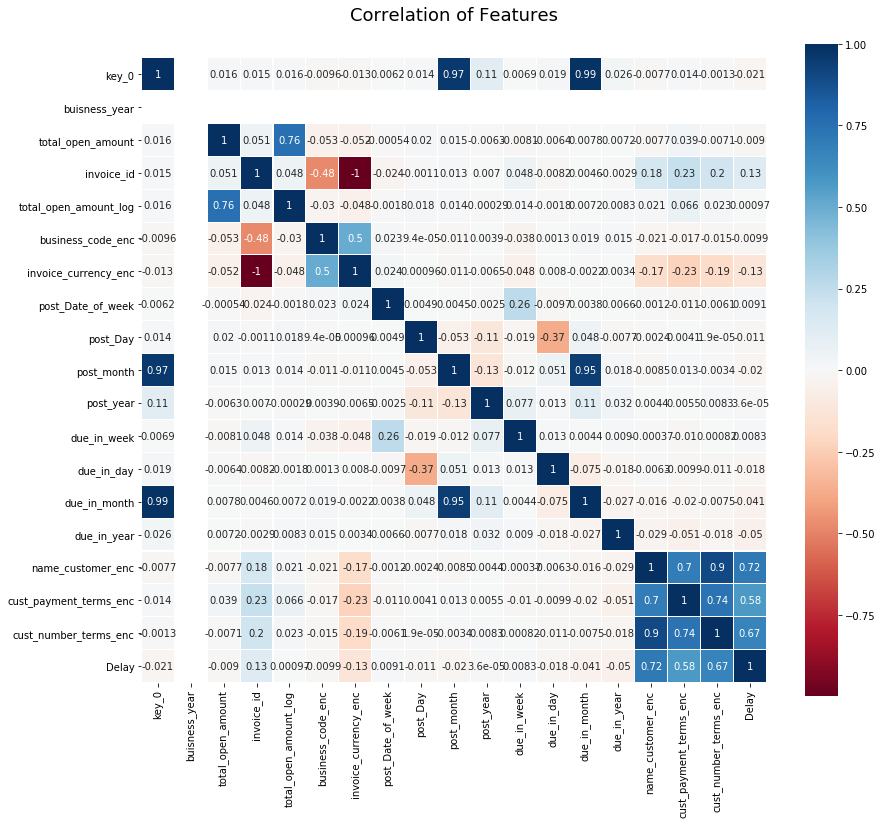

In [108]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Correlation of Features', y=1.05, size=18)
sns.heatmap(x_train.merge(y_train , on = x_train.index ).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [109]:
# here we can see that business year is a constant feature hence we can drop it

In [110]:
x_train,x_val,x_test = snap("buisness_year")

In [111]:
x_train,x_val,x_test = snap("invoice_currency_enc")

In [112]:
x_train,x_val,x_test = snap("invoice_id") # as these are not maped in featues so we can drop or leave it 

In [113]:
x_train,x_val,x_test = snap("post_year") 

In [114]:
x_train,x_val,x_test = snap("due_in_year")

In [115]:
x_train.dtypes

cust_number                object
name_customer              object
total_open_amount         float64
cust_payment_terms         object
total_open_amount_log     float64
business_code_enc           int32
post_Date_of_week           int64
post_Day                    int64
post_month                  int64
due_in_week                 int64
due_in_day                  int64
due_in_month                int64
name_customer_enc         float64
cust_payment_terms_enc    float64
cust_number_terms_enc     float64
dtype: object

In [116]:
# also since all the columns have been converted to int/ float , 
#we can use variance threshold -- ;-D

from sklearn.feature_selection import VarianceThreshold
df = VarianceThreshold(0.85)
df.fit(X_temp)

VarianceThreshold(threshold=0.85)

In [117]:
df.variances_

array([67.44877855, 43.55371243, 76.68716097, 76.99680494,  3.31889527,
        3.10853835, 58.91536555])

In [118]:
# checked using different features but didnot work

In [119]:
#Wraper Method for feature selection 

In [120]:
def feature(X,y):
    from mlxtend.feature_selection import SequentialFeatureSelector as SFS
    from sklearn.linear_model import LinearRegression
    sfs = SFS(LinearRegression(),
              k_features=7,
              forward=True,
              scoring = 'r2',
              cv = 3)
    sfs.fit(X, y)        
    
    return sfs.k_feature_names_

In [121]:
feature(x_train,y_train)
#features selected by FFS

('cust_number',
 'name_customer',
 'total_open_amount',
 'cust_payment_terms',
 'total_open_amount_log',
 'business_code_enc',
 'post_Date_of_week')

In [122]:
x_train.dtypes

cust_number                object
name_customer              object
total_open_amount         float64
cust_payment_terms         object
total_open_amount_log     float64
business_code_enc           int32
post_Date_of_week           int64
post_Day                    int64
post_month                  int64
due_in_week                 int64
due_in_day                  int64
due_in_month                int64
name_customer_enc         float64
cust_payment_terms_enc    float64
cust_number_terms_enc     float64
dtype: object

# modelling

# create a basic model

In [123]:
# fiting data on linear model
from sklearn.linear_model import LinearRegression
basic_model = LinearRegression()
basic_model.fit(X_temp, y_train)
# it is the process of finding a line that best fits the data points available on the plot, 
# so that we can use it to predict output values for inputs that are not present in the data set we have

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [124]:
# predicting value
y_predicted = basic_model.predict(x_tempval)

In [125]:
# chacking RMSE on validation data 
from sklearn.metrics import mean_squared_error

mean_squared_error(y_val, y_predicted, squared=False)

4.289304748927384

# Tree based model

In [126]:
# checking Decision tree model
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0 , max_depth=1,min_samples_split=4)
from sklearn.metrics import mean_squared_error
# it  use a series of if-then rules to generate predictions from one or more decision trees

In [127]:
# training the model with the selected features
regressor.fit(X_temp, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=1,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=4,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [128]:
# Predicting value of decision tree on test and validation data
y_predicted2 = regressor.predict(x_tempval)
y_predicted5 = regressor.predict(x_temptest)

In [129]:
mean_squared_error(y_val, y_predicted2, squared=False)

5.924479133361138

In [130]:
mean_squared_error(y_test, y_predicted5, squared=False)

8.821826687930132

In [131]:
# R2 score check for checking model accuracy on validation data
from sklearn.metrics import r2_score
r2_score(y_val, y_predicted2)

0.3889232996992755

In [132]:
# R2 score check for checking model accuracy on test data
from sklearn.metrics import r2_score
r2_score(y_test, y_predicted5)

0.3389527415504273

# GBR model

In [133]:
from sklearn.ensemble import GradientBoostingRegressor
GBR_model = GradientBoostingRegressor(max_depth=1)
# it is a machine learning technique for regression, classification and other tasks,
# it produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees.

In [134]:
# training the model with the selected features
GBR_model.fit(X_temp, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=1,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [135]:
# predicting the value on validation and test dataset
y_predicted4 =GBR_model.predict(x_tempval)
y_predicted6 =GBR_model.predict(x_temptest)

In [136]:
# R2 score check for checking model accuracy on validation dataset
from sklearn.metrics import r2_score
r2_score(y_val, y_predicted4)

0.6779256319621895

In [137]:
# R2 score check for checking model accuracy on test dataset 
from sklearn.metrics import r2_score
r2_score(y_test, y_predicted6)

0.6742937630412269

In [138]:
x_test.dtypes

cust_number                object
name_customer              object
total_open_amount         float64
cust_payment_terms         object
total_open_amount_log     float64
business_code_enc           int32
post_Date_of_week           int64
post_Day                    int64
post_month                  int64
due_in_week                 int64
due_in_day                  int64
due_in_month                int64
name_customer_enc         float64
cust_payment_terms_enc    float64
cust_number_terms_enc     float64
dtype: object

# RandomForestRegressor

In [139]:
from sklearn.ensemble import RandomForestRegressor
random_regressor = RandomForestRegressor()
# it is a supervised learning algorithm that uses ensemble learning method for regression
#  operates by constructing several decision trees during training time and outputting the mean 
# of the classes as the prediction of all the trees.

In [140]:
random_regressor.fit(X_temp, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [141]:
y_predicted3 = random_regressor.predict(x_tempval)
y_predicted7 = random_regressor.predict(x_temptest)

In [142]:
mean_squared_error(y_val, y_predicted3, squared=False)

12.127141011631009

In [143]:
mean_squared_error(y_test, y_predicted7, squared=False)

6.773960388892071

In [144]:
from sklearn.metrics import r2_score
r2_score(y_test, y_predicted7)

0.6102368549302764

In [145]:
# from above modeling Tree based model give the best result .

# The test Dataset

In [146]:
#checking all NaN value
test

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
10,U001,0100058020,KIM',NaN,2020.0,1.930839e+09,2020-05-01,20200429,20200501,20200501.0,USD,RV,1.0,NaN,2689.50,20200501.0,NAB1,1.930839e+09,1
15,U001,0200762950,HAR corp,NaN,2020.0,1.930857e+09,2020-05-04,20200504,20200504,20200519.0,USD,RV,1.0,NaN,30270.22,20200504.0,NAA8,1.930857e+09,1
17,U001,0200726979,BJ'S foundation,NaN,2020.0,1.930623e+09,2020-03-09,20200308,20200309,20200324.0,USD,RV,1.0,NaN,1221.47,20200309.0,NAA8,1.930623e+09,1
24,U001,0200020431,DEC associates,NaN,2020.0,1.930768e+09,2020-04-09,20200409,20200409,20200424.0,USD,RV,1.0,NaN,245.52,20200401.0,NAM4,1.930768e+09,1
25,U001,0200457993,SHAM associates,NaN,2020.0,1.930725e+09,2020-03-31,20200401,20200331,20200415.0,USD,RV,1.0,NaN,19126.23,20200331.0,NAA8,1.930725e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49976,U001,0200729290,KROGER,NaN,2020.0,1.930690e+09,2020-03-24,20200324,20200324,20200408.0,USD,RV,1.0,NaN,24597.15,20200324.0,NAA8,1.930690e+09,1
49981,U001,200769623,WAL-MAR foundation,NaN,2020.0,1.930872e+09,2020-05-08,20200508,20200508,20200523.0,USD,RV,1.0,NaN,1991.84,20200508.0,NAH4,1.930872e+09,1
49991,U001,0200516657,MAINES in,NaN,2020.0,1.930571e+09,2020-03-03,20200302,20200303,20200318.0,USD,RV,1.0,NaN,11509.36,20200303.0,NAA8,1.930571e+09,1
49998,U001,0200772670,ASSOCIAT foundation,NaN,2020.0,1.930701e+09,2020-03-25,20200325,20200325,20200409.0,USD,RV,1.0,NaN,28623.15,20200325.0,NAU5,1.930701e+09,1


In [147]:
#preprocessing on test data as done on train data

# Null/Constant/duplicate removal

In [148]:
test.isna().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             10000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    0
isOpen                        0
dtype: int64

In [149]:
# droping all the null and constant column 
test.drop('area_business',axis=1,inplace=True)

In [150]:
test.drop('document_create_date.1',axis=1,inplace=True)

In [151]:
test.drop('doc_id',axis=1,inplace=True)

In [152]:
test.drop('document type',axis=1,inplace=True)

In [153]:
#duplicate row removal
test=test.drop_duplicates(keep='first')

In [154]:
test.shape

(9683, 15)

In [155]:
test.cov()

,buisness_year,document_create_date,due_in_date,posting_id,total_open_amount,baseline_create_date,invoice_id,isOpen
buisness_year,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0
document_create_date,0.0,4.824205e+03,4.011870e+03,0.0,-5.027050e+04,4.674295e+03,-3.963651e+08,0.0
due_in_date,0.0,4.011870e+03,5.362954e+03,0.0,-9.613215e+04,4.027943e+03,-1.039744e+09,0.0
posting_id,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0
total_open_amount,0.0,-5.027050e+04,-9.613215e+04,0.0,1.341019e+09,-3.382032e+04,1.778014e+12,0.0
baseline_create_date,0.0,4.674295e+03,4.027943e+03,0.0,-3.382032e+04,4.774947e+03,2.434499e+08,0.0
invoice_id,0.0,-3.963651e+08,-1.039744e+09,0.0,1.778014e+12,2.434499e+08,6.638773e+16,0.0
isOpen,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0


In [156]:
test.nunique()

business_code              5
cust_number              670
name_customer           1747
clear_date                 0
buisness_year              1
posting_date              81
document_create_date      86
due_in_date              131
invoice_currency           2
posting_id                 1
total_open_amount       9051
baseline_create_date      86
cust_payment_terms        45
invoice_id              9683
isOpen                     1
dtype: int64

In [157]:
test.shape

(9683, 15)

In [158]:
test.dtypes

business_code            object
cust_number              object
name_customer            object
clear_date               object
buisness_year           float64
posting_date             object
document_create_date      int64
due_in_date             float64
invoice_currency         object
posting_id              float64
total_open_amount       float64
baseline_create_date    float64
cust_payment_terms       object
invoice_id              float64
isOpen                    int64
dtype: object

In [159]:
# normalizing amount

In [160]:
# equalizing 1 cad=0.81 usd
test.loc[test.invoice_currency== "CAD", 'total_open_amount'] = test['total_open_amount']*0.81

In [161]:
test

,business_code,cust_number,name_customer,clear_date,buisness_year,posting_date,document_create_date,due_in_date,invoice_currency,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
10,U001,0100058020,KIM',NaN,2020.0,2020-05-01,20200429,20200501.0,USD,1.0,2689.50,20200501.0,NAB1,1.930839e+09,1
15,U001,0200762950,HAR corp,NaN,2020.0,2020-05-04,20200504,20200519.0,USD,1.0,30270.22,20200504.0,NAA8,1.930857e+09,1
17,U001,0200726979,BJ'S foundation,NaN,2020.0,2020-03-09,20200308,20200324.0,USD,1.0,1221.47,20200309.0,NAA8,1.930623e+09,1
24,U001,0200020431,DEC associates,NaN,2020.0,2020-04-09,20200409,20200424.0,USD,1.0,245.52,20200401.0,NAM4,1.930768e+09,1
25,U001,0200457993,SHAM associates,NaN,2020.0,2020-03-31,20200401,20200415.0,USD,1.0,19126.23,20200331.0,NAA8,1.930725e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49972,U001,0200769623,WAL-MAR us,NaN,2020.0,2020-03-08,20200307,20200323.0,USD,1.0,4052.44,20200308.0,NAH4,1.930620e+09,1
49976,U001,0200729290,KROGER,NaN,2020.0,2020-03-24,20200324,20200408.0,USD,1.0,24597.15,20200324.0,NAA8,1.930690e+09,1
49981,U001,200769623,WAL-MAR foundation,NaN,2020.0,2020-05-08,20200508,20200523.0,USD,1.0,1991.84,20200508.0,NAH4,1.930872e+09,1
49998,U001,0200772670,ASSOCIAT foundation,NaN,2020.0,2020-03-25,20200325,20200409.0,USD,1.0,28623.15,20200325.0,NAU5,1.930701e+09,1


In [162]:
# sorting and reindexing on the basis of 'posting_date'
test=test.sort_values(by=['posting_date'],ascending=True).reset_index(drop=True)

In [163]:
test

,business_code,cust_number,name_customer,clear_date,buisness_year,posting_date,document_create_date,due_in_date,invoice_currency,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR corp,NaN,2020.0,2020-02-27,20200226,20200313.0,USD,1.0,7925.6800,20200227.0,NAH4,1.930576e+09,1
1,U001,0200936373,SUPE associates,NaN,2020.0,2020-02-27,20200225,20200313.0,USD,1.0,50961.4300,20200227.0,NAA8,1.930568e+09,1
2,U001,0200713007,KEEFE foundation,NaN,2020.0,2020-02-27,20200227,20200313.0,USD,1.0,29988.0000,20200227.0,NAA8,1.930578e+09,1
3,U001,0200769623,WAL-MAR us,NaN,2020.0,2020-02-27,20200226,20200313.0,USD,1.0,8766.3800,20200227.0,NAH4,1.930574e+09,1
4,U001,0200769623,WAL-MAR,NaN,2020.0,2020-02-27,20200225,20200313.0,USD,1.0,42357.1200,20200227.0,NAH4,1.930567e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9678,U001,200076137,OLLIE us,NaN,2020.0,2020-05-13,20200505,20200528.0,USD,1.0,1267.2000,20200513.0,NAA8,1.930861e+09,1
9679,CA02,0140104392,FLANAG us,NaN,2020.0,2020-05-14,20200514,20200524.0,CAD,1.0,3038.1723,20200514.0,CA10,2.960635e+09,1
9680,U001,0200915438,GROC associates,NaN,2020.0,2020-05-15,20200507,20200530.0,USD,1.0,2625.0000,20200515.0,NAA8,1.930876e+09,1
9681,U001,200875680,MINERS,NaN,2020.0,2020-05-18,20200516,20200602.0,USD,1.0,119248.8300,20200518.0,NAA8,1.930911e+09,1


In [164]:
# datetime - format change of required features

In [165]:
test['document_create_date']=test['document_create_date'].astype(str)
test['due_in_date']=test['due_in_date'].astype(str)
test['clear_date']=test['clear_date'].astype(str)
test['posting_date']=test['posting_date'].astype(str)
test['baseline_create_date']=test['baseline_create_date'].astype(str)


In [166]:

test['clear_date']= pd.to_datetime(test['clear_date'])

test['document_create_date']= pd.to_datetime(test['document_create_date'])

In [167]:
test.dtypes

business_code                   object
cust_number                     object
name_customer                   object
clear_date              datetime64[ns]
buisness_year                  float64
posting_date                    object
document_create_date    datetime64[ns]
due_in_date                     object
invoice_currency                object
posting_id                     float64
total_open_amount              float64
baseline_create_date            object
cust_payment_terms              object
invoice_id                     float64
isOpen                           int64
dtype: object

In [168]:
#droped after converting them into required features
test.drop('document_create_date',axis=1,inplace=True)

In [169]:
test.drop('baseline_create_date',axis=1,inplace=True)

In [170]:
test['due_in_date'] = pd.to_datetime(test['due_in_date'], format="%Y%m%d")

In [171]:
test['posting_date'] = pd.to_datetime(test['posting_date'])

# Encoding the features

In [172]:
from sklearn.preprocessing import LabelEncoder

In [173]:
test.dtypes

business_code                 object
cust_number                   object
name_customer                 object
clear_date            datetime64[ns]
buisness_year                float64
posting_date          datetime64[ns]
due_in_date           datetime64[ns]
invoice_currency              object
posting_id                   float64
total_open_amount            float64
cust_payment_terms            object
invoice_id                   float64
isOpen                         int64
dtype: object

In [174]:
#use label encoder for the business_code
business_code_enc = LabelEncoder()
business_code_enc.fit(test['business_code'])
test['business_code_enc'] = business_code_enc.transform(test['business_code'])

In [175]:
test.drop('business_code',axis=1,inplace=True)

In [176]:
#use label encoder for the invoice currency
invoice_currency_enc = LabelEncoder()
invoice_currency_enc.fit(test['invoice_currency'])
test['invoice_currency_enc'] = invoice_currency_enc.transform(test['invoice_currency'])

In [177]:
test.drop('invoice_currency',axis=1,inplace=True)

In [178]:
test.dtypes

cust_number                     object
name_customer                   object
clear_date              datetime64[ns]
buisness_year                  float64
posting_date            datetime64[ns]
due_in_date             datetime64[ns]
posting_id                     float64
total_open_amount              float64
cust_payment_terms              object
invoice_id                     float64
isOpen                           int64
business_code_enc                int32
invoice_currency_enc             int32
dtype: object

In [179]:
# extract date , day ,month , year of the journey
# 0--> Monday ..... 6--> Sunday
test['due_in_week']=test['due_in_date'].dt.weekday
test['due_in_day']=test['due_in_date'].dt.day
test['due_in_month']=test['due_in_date'].dt.month
test['due_in_year']=test['due_in_date'].dt.year


In [180]:
test.dtypes


cust_number                     object
name_customer                   object
clear_date              datetime64[ns]
buisness_year                  float64
posting_date            datetime64[ns]
due_in_date             datetime64[ns]
posting_id                     float64
total_open_amount              float64
cust_payment_terms              object
invoice_id                     float64
isOpen                           int64
business_code_enc                int32
invoice_currency_enc             int32
due_in_week                      int64
due_in_day                       int64
due_in_month                     int64
due_in_year                      int64
dtype: object

In [181]:
# target encoding on cust_number ,name_customer and cust_payment_terms

In [182]:
cust_number_mean_t = x_train.merge(y_train,on = x_train.index).groupby(['cust_number'])['Delay'].mean().to_dict()
test['cust_number_terms_enc']=test['cust_number'].map(cust_number_mean_t)

In [183]:
test['cust_number_terms_enc'].isna().sum()

106

In [184]:
test['cust_number_terms_enc'].fillna(0,inplace=True)

In [185]:
name_customer_ts = x_train.merge(y_train,on = x_train.index).groupby(['name_customer'])['Delay'].mean().to_dict()
test['name_customer_enc']=test['name_customer'].map(name_customer_ts)

In [186]:
test['name_customer_enc'].isna().sum()

350

In [187]:
test['name_customer_enc'].fillna(0,inplace=True)

In [188]:
cust_payment_terms_ts = x_train.merge(y_train,on = x_train.index).groupby(['cust_payment_terms'])['Delay'].mean().to_dict()
test['cust_payment_terms_enc']=test['cust_payment_terms'].map(cust_payment_terms_ts)

In [189]:
test['cust_payment_terms_enc'].isna().sum()

6

In [190]:
test['cust_payment_terms_enc'].fillna(0,inplace=True)

In [191]:
test['total_open_amount_log']=np.log(test['total_open_amount'])

In [192]:
# converting 'posting_date' required feature
test['post_Date_of_week']=test['posting_date'].dt.weekday
test['post_Day']=test['posting_date'].dt.day
test['post_month']=test['posting_date'].dt.month
test['post_year']=test['posting_date'].dt.year

In [193]:
# maping feature which are used to train the model
n_set=test[imp_features]

In [194]:
test.dtypes

cust_number                       object
name_customer                     object
clear_date                datetime64[ns]
buisness_year                    float64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
posting_id                       float64
total_open_amount                float64
cust_payment_terms                object
invoice_id                       float64
isOpen                             int64
business_code_enc                  int32
invoice_currency_enc               int32
due_in_week                        int64
due_in_day                         int64
due_in_month                       int64
due_in_year                        int64
cust_number_terms_enc            float64
name_customer_enc                float64
cust_payment_terms_enc           float64
total_open_amount_log            float64
post_Date_of_week                  int64
post_Day                           int64
post_month                         int64
post_year       

In [195]:
test['posting_date']= pd.to_datetime(test['posting_date'])

In [196]:
# predicting the delay value on test data set using the best model fited from above modelling
test['Delay']=GBR_model.predict(n_set)

In [197]:
# Rounding the delay column to get perfect result
test['Delay'] = test['Delay'].round(0)

In [198]:
# Adding due date to delay to get clear_date
test['clear_date'] = test['due_in_date']+pd.to_timedelta(test['Delay'],unit='D')

In [199]:
test

,cust_number,name_customer,clear_date,buisness_year,posting_date,due_in_date,posting_id,total_open_amount,cust_payment_terms,invoice_id,...,due_in_year,cust_number_terms_enc,name_customer_enc,cust_payment_terms_enc,total_open_amount_log,post_Date_of_week,post_Day,post_month,post_year,Delay
0,0200769623,WAL-MAR corp,2020-03-11,2020.0,2020-02-27,2020-03-13,1.0,7925.6800,NAH4,1.930576e+09,...,2020,-1.946104,-1.866071,-1.655828,8.977863,3,27,2,2020,-2.0
1,0200936373,SUPE associates,2020-03-16,2020.0,2020-02-27,2020-03-13,1.0,50961.4300,NAA8,1.930568e+09,...,2020,1.184332,2.800000,1.430860,10.838824,3,27,2,2020,3.0
2,0200713007,KEEFE foundation,2020-03-11,2020.0,2020-02-27,2020-03-13,1.0,29988.0000,NAA8,1.930578e+09,...,2020,-3.100000,-4.000000,1.430860,10.308553,3,27,2,2020,-2.0
3,0200769623,WAL-MAR us,2020-03-11,2020.0,2020-02-27,2020-03-13,1.0,8766.3800,NAH4,1.930574e+09,...,2020,-1.946104,-2.483309,-1.655828,9.078679,3,27,2,2020,-2.0
4,0200769623,WAL-MAR,2020-03-11,2020.0,2020-02-27,2020-03-13,1.0,42357.1200,NAH4,1.930567e+09,...,2020,-1.946104,-1.883929,-1.655828,10.653892,3,27,2,2020,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9678,200076137,OLLIE us,2020-05-28,2020.0,2020-05-13,2020-05-28,1.0,1267.2000,NAA8,1.930861e+09,...,2020,6.333333,-1.500000,1.430860,7.144565,2,13,5,2020,-0.0
9679,0140104392,FLANAG us,2020-05-29,2020.0,2020-05-14,2020-05-24,1.0,3038.1723,CA10,2.960635e+09,...,2020,7.375000,6.000000,6.444495,8.019011,3,14,5,2020,5.0
9680,0200915438,GROC associates,2020-06-02,2020.0,2020-05-15,2020-05-30,1.0,2625.0000,NAA8,1.930876e+09,...,2020,1.025000,3.285714,1.430860,7.872836,4,15,5,2020,3.0
9681,200875680,MINERS,2020-06-02,2020.0,2020-05-18,2020-06-02,1.0,119248.8300,NAA8,1.930911e+09,...,2020,0.000000,0.000000,1.430860,11.688968,0,18,5,2020,0.0


In [200]:
test['Delay'].value_counts()

-2.0     2784
 1.0     2410
 0.0      896
 2.0      818
-1.0      744
 3.0      541
-6.0      295
 5.0      164
 4.0      122
 9.0       99
-8.0       98
-3.0       75
 7.0       69
-7.0       65
-11.0      63
 10.0      59
 6.0       50
-5.0       47
-9.0       38
-4.0       34
 8.0       32
 11.0      26
-12.0      21
 40.0      18
 41.0      17
-10.0      11
 12.0      11
 42.0       6
-13.0       6
 13.0       6
-15.0       6
-14.0       6
 17.0       4
-31.0       3
-16.0       3
-35.0       3
 16.0       3
 56.0       2
-32.0       2
 14.0       2
 21.0       2
 58.0       2
 36.0       2
 26.0       2
 44.0       2
 34.0       2
 19.0       1
 43.0       1
 25.0       1
-40.0       1
 98.0       1
 15.0       1
-22.0       1
 20.0       1
 53.0       1
 27.0       1
 92.0       1
 46.0       1
Name: Delay, dtype: int64

In [201]:
# bucket function for bucket column
def bucketSize(z):
    if z<=0:
        return 1
    if z>0 and z<=15:
        return 2
    if z>15 and z<=30:
        return 3
    if z>30 and z<=45:
        return 4
    if z>45 and z<=60:
        return 5

In [202]:
# calling the bucket function 
test['Bucket'] = test.apply(lambda row : bucketSize(row['Delay']), axis = 1)

In [203]:
test

,cust_number,name_customer,clear_date,buisness_year,posting_date,due_in_date,posting_id,total_open_amount,cust_payment_terms,invoice_id,...,cust_number_terms_enc,name_customer_enc,cust_payment_terms_enc,total_open_amount_log,post_Date_of_week,post_Day,post_month,post_year,Delay,Bucket
0,0200769623,WAL-MAR corp,2020-03-11,2020.0,2020-02-27,2020-03-13,1.0,7925.6800,NAH4,1.930576e+09,...,-1.946104,-1.866071,-1.655828,8.977863,3,27,2,2020,-2.0,1.0
1,0200936373,SUPE associates,2020-03-16,2020.0,2020-02-27,2020-03-13,1.0,50961.4300,NAA8,1.930568e+09,...,1.184332,2.800000,1.430860,10.838824,3,27,2,2020,3.0,2.0
2,0200713007,KEEFE foundation,2020-03-11,2020.0,2020-02-27,2020-03-13,1.0,29988.0000,NAA8,1.930578e+09,...,-3.100000,-4.000000,1.430860,10.308553,3,27,2,2020,-2.0,1.0
3,0200769623,WAL-MAR us,2020-03-11,2020.0,2020-02-27,2020-03-13,1.0,8766.3800,NAH4,1.930574e+09,...,-1.946104,-2.483309,-1.655828,9.078679,3,27,2,2020,-2.0,1.0
4,0200769623,WAL-MAR,2020-03-11,2020.0,2020-02-27,2020-03-13,1.0,42357.1200,NAH4,1.930567e+09,...,-1.946104,-1.883929,-1.655828,10.653892,3,27,2,2020,-2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9678,200076137,OLLIE us,2020-05-28,2020.0,2020-05-13,2020-05-28,1.0,1267.2000,NAA8,1.930861e+09,...,6.333333,-1.500000,1.430860,7.144565,2,13,5,2020,-0.0,1.0
9679,0140104392,FLANAG us,2020-05-29,2020.0,2020-05-14,2020-05-24,1.0,3038.1723,CA10,2.960635e+09,...,7.375000,6.000000,6.444495,8.019011,3,14,5,2020,5.0,2.0
9680,0200915438,GROC associates,2020-06-02,2020.0,2020-05-15,2020-05-30,1.0,2625.0000,NAA8,1.930876e+09,...,1.025000,3.285714,1.430860,7.872836,4,15,5,2020,3.0,2.0
9681,200875680,MINERS,2020-06-02,2020.0,2020-05-18,2020-06-02,1.0,119248.8300,NAA8,1.930911e+09,...,0.000000,0.000000,1.430860,11.688968,0,18,5,2020,0.0,1.0


# Thank You 
# By Krishna Narayan Singh 
# H2HBABBA2629  House gunther